In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 
mpl.rcParams['font.sans-serif'] = ['simhei'] 
mpl.rcParams['font.serif'] = ['simhei'] 
sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


## 整体数据查看

In [2]:
# 训练数据预览
train_data = pd.read_csv("input/train.csv")
train_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# 测试数据预览
test_data = pd.read_csv("input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 训练数据与测试数据集合，方便后续进行数据预处理
train_test_data_set = [train_data,test_data]

In [5]:
# 查看训练数据特征构成
# Age、Cabin、Embarked 存在缺失
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# 查看测试数据特征构成
# Age、Cabin、Fire 存在缺失
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# 训练数据各项指标
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 特征工程
### 性别 Sex
  

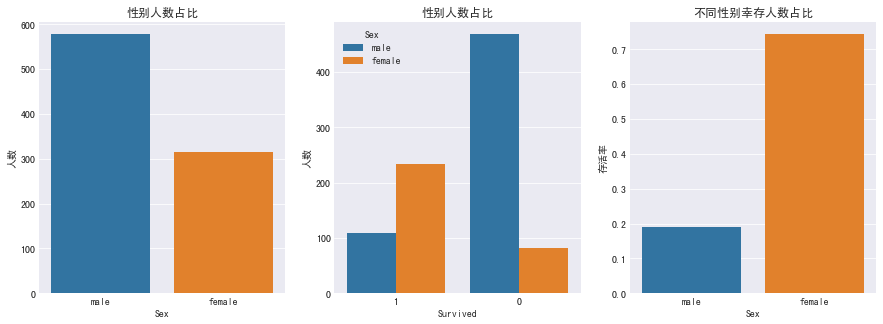

In [8]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
g1 = sns.countplot(x="Sex", data=train_data, ax=axis1)
g1.set_title("性别人数占比")
g1.set_ylabel("人数")
g2 = sns.countplot(x="Survived", hue="Sex", data=train_data, order=[1,0], ax=axis2)
g2.set_title("性别人数占比")
g2.set_ylabel("人数")
sex_group_mean = train_data[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()
g3 = sns.barplot(x="Sex",y="Survived",data=sex_group_mean,order=["male","female"],ax=axis3)
g3.set_title("不同性别幸存人数占比")
g3 = g3.set_ylabel("存活率")

由上图可得出  
* 男性比例远远大于女性比例，但是女性存活人数大于男性，即女性存活率大于男性
* 女性存活率大于70%，男性存活率仅有20%
* 性别是存活与否的强相关因素

## 年龄 Age

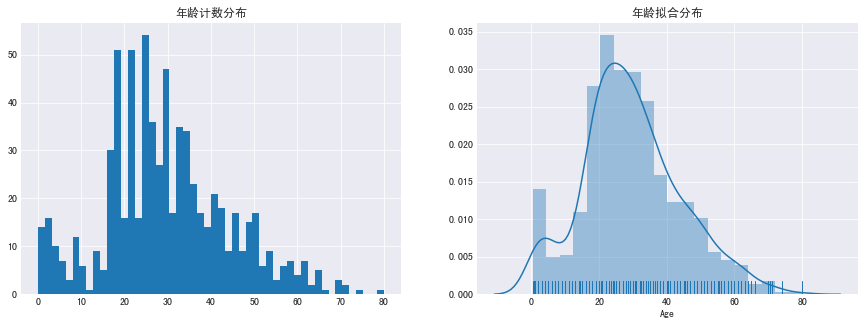

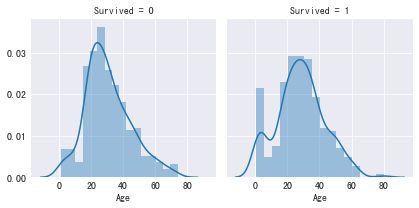

In [9]:
# 查看年龄分布
from scipy import stats
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
g1 = train_data['Age'].dropna().astype(int).hist(bins=50, ax=axis1)
g1.set_title("年龄计数分布")
g2 = sns.distplot(train_data['Age'].dropna(),rug = True,ax = axis2)
g2.set_title("年龄拟合分布")
g3 = sns.FacetGrid(train_data, col='Survived').map(sns.distplot, "Age")

/home/sy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


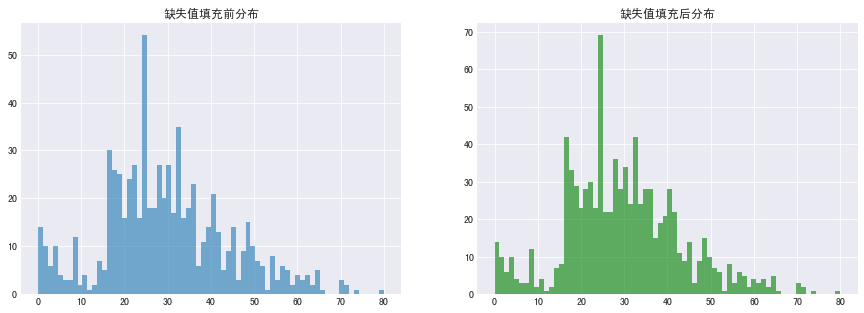

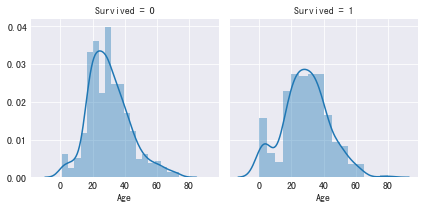

In [10]:
# 缺失值处理
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
g1 = train_data['Age'].dropna().astype(int).hist(bins=70, ax=axis1, alpha=0.6)
g1 = g1.set_title("缺失值填充前分布")
# 获取训练集年龄特征的平均值、标准差、计数
average_age_train = train_data["Age"].mean()
std_age_train = train_data["Age"].std()
count_nan_age_train = train_data["Age"].isnull().sum()
# 获取测试集年龄特征的平均值、标准差、计数
average_age_test = test_data["Age"].mean()
std_age_test = test_data["Age"].std()
count_nan_age_test = test_data["Age"].isnull().sum()
# 生成填充年龄缺失值的随机区间[mean - std , mean + std]
train_age_rand_interval = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_age_train)
test_age_rand_interval = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)
# 填充
train_data["Age"][np.isnan(train_data["Age"])] = train_age_rand_interval
test_data["Age"][np.isnan(test_data["Age"])] = test_age_rand_interval
train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)
# 填充后对比
g2 = train_data['Age'].astype(int).hist(bins=70, ax=axis2, color="g", alpha=0.6)
g2 = g2.set_title("缺失值填充后分布")
g3 = sns.FacetGrid(train_data, col='Survived').map(sns.distplot, "Age")


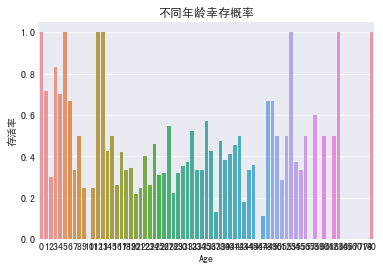

In [11]:
# 训练集不同年龄幸存概率
age_group_mean = train_data[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g4 = sns.barplot(x="Age",y="Survived",data=age_group_mean)
g4.set_title("不同年龄幸存概率")
g4 = g4.set_ylabel("存活率")

## Sex & Age

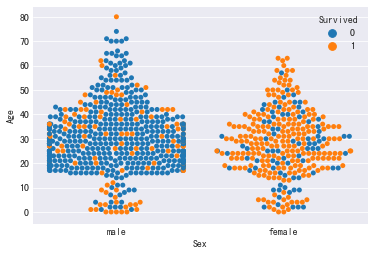

In [12]:
# Sex和Age关于幸存与否的分布
ｇ = sns.swarmplot(x="Sex", y="Age", hue="Survived",
                    data=train_data)

## SibSp＆Parch

/home/sy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


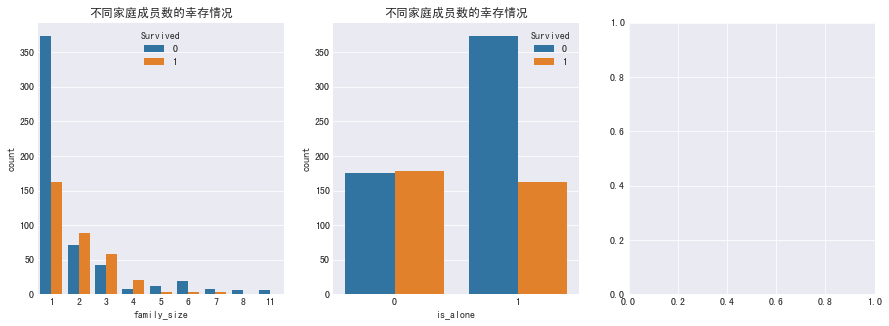

In [19]:
# 获取家庭成员数、是否独自出行
for df_temp in train_test_data_set:
    df_temp['family_size'] = df_temp ['SibSp'] + df_temp['Parch'] + 1
    df_temp['is_alone'] = 1 
    df_temp['is_alone'].loc[df_temp['family_size'] > 1] = 0
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
g = sns.countplot(x="family_size", hue="Survived", data=train_data, ax=axis1)
g = g.set_title("不同家庭成员数的幸存情况")
g2 = sns.countplot(x="is_alone", hue="Survived", data=train_data,ax=axis2)
g2 = g2.set_title("不同家庭成员数的幸存情况")

## 综合处理

In [ ]:
# 年龄二值化
for df_temp in train_test_data_set:
    df_temp['Sex'] = df_temp['Sex'].map( {'female': 0, 'male': 1} ).astype(int)